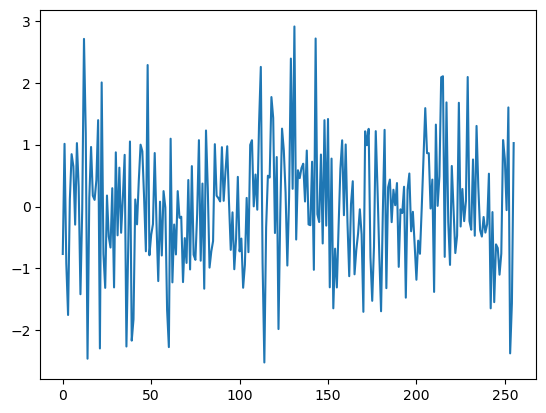

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def fun_meyer(x, param):

    p = np.array([-20,70,-84, 35, 0, 0, 0, 0])
    # x = np.linspace(0,5)
    y = np.ones_like(x)

    y[x <= param[0] ] = 0.
    y[x >= param[3] ] = 0.
    xx = (x[ (x >= param[0]) & (x <= param[1]) ] -param[0] ) /(param[1]-param[0])
    y[ (x >= param[0]) & (x <= param[1]) ] = np.polyval( p, xx)
    xx = (x[ (x >= param[2]) & (x <= param[3]) ] - param[3] ) /(param[2]-param[3])
    y[ (x >= param[2]) & (x <= param[3]) ] = np.polyval( p, xx)
    return y.reshape(x.shape)

N = 256
sig = np.random.randn(N)
plt.plot(sig)



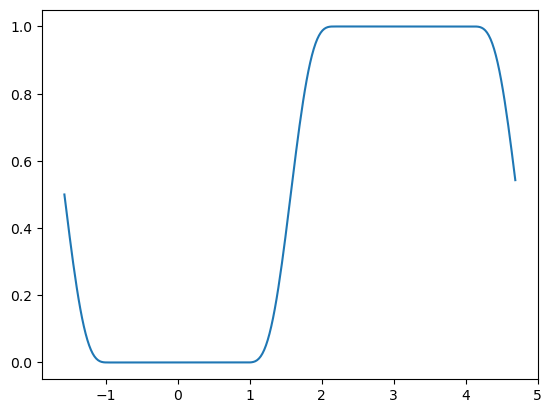

In [8]:
sp = 2*np.pi/N 
grid = -np.pi/2 + np.linspace(0, 2*np.pi - sp, N)
prmfilt = np.pi*np.array( [-0.2, 0.2, 0.8, 1.2])
ff = fun_meyer(grid, prmfilt)
ff = np.roll(ff, N//4)
plt.plot(grid, ff)


In [10]:
fsig = np.fft.fft(sig)
fsigwin = fsig*ff

rsig = np.real(np.fft.ifft(fsigwin))
print(sig[:5])
print(2*rsig[:5])

[-0.76665987  1.01366594 -0.92151088 -1.7526714   0.11438261]
[-0.76665987  1.01366594 -0.92151088 -1.7526714   0.11438261]
